# 🌍 地球出汗记：极端蒸散发入门教程
## Tutorial 01: Understanding Extreme Evapotranspiration for Freshmen

**欢迎来到气候科学的奇妙世界！**

这个教程是专门为大一新生设计的，不需要你有复杂的数学或编程背景。我们将用最直观的方式，带你理解什么是"极端蒸散发"，以及如何用 Python 来研究它。

---

### 本教程包含：
1. 🌱 什么是"极端蒸散发"？为什么重要？
2. ☀️ 第一步：计算地球的"出汗量" (ET0)
3. 🎯 第二步：如何抓住"极端"事件
4. 🔍 第三步：找出"罪魁祸首" (驱动因子分析)
5. 🎉 动手试试：自己创造一个极端事件！

---
## 第 1 部分：什么是"极端蒸散发"？

### 🌍 想象一下：地球也会"出汗"

就像我们在炎热的夏天会出汗一样，地球表面的水分也会蒸发到空气中。这个过程叫做**蒸散发 (Evapotranspiration, ET)**。

- **蒸发 (Evaporation)**：土壤、湖泊、河流的水分变成水蒸气
- **蒸腾 (Transpiration)**：植物通过叶片释放水分

### ⚠️ 什么是"极端"蒸散发？

当地球突然"疯狂出汗"时，土壤迅速干燥，植物开始枯萎，这就是**极端蒸散发事件 (Extreme ET Event)**。

**后果严重！**
- 💧 土壤迅速失水 → **闪旱 (Flash Drought)**
- 🌾 农作物减产 → **粮食危机**
- 🔥 植被干燥 → **野火风险增加**

### 📖 真实案例
- **2012年美国大平原**：创纪录的高温和极端ET导致严重干旱，农业损失超过300亿美元
- **2018年欧洲热浪**：极端蒸散发加剧了干旱，导致多个国家农业减产

---
## 第 2 部分：计算地球的"出汗量" (ET0)

### 📚 物理原理：Penman-Monteith 公式

别被这个复杂的名字吓到！这个公式的核心思想很简单：

**地球的出汗量取决于四个关键因素：**

1. ☀️ **太阳辐射 (Solar Radiation)**：能量来源，太阳越猛烈，蒸发越快
2. 🌡️ **温度 (Temperature)**：高温让空气能容纳更多水蒸气
3. 💨 **风速 (Wind Speed)**：风把湿空气吹走，加速蒸发
4. 💧 **湿度 (Humidity)**：空气越干燥，越"渴"，蒸发越快

### 🧮 公式简化版本

$$
ET_0 = \frac{\text{能量项} + \text{空气动力项}}{\text{阻抗项}}
$$

- **能量项**：主要由太阳辐射和温度决定
- **空气动力项**：由风速和湿度决定
- **阻抗项**：大气的"抵抗力"

幸运的是，我们不需要手算！这个工具包已经帮我们实现好了。

In [1]:
# 首先，安装和导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import sys

# 导入我们的核心模块
from src.penman_monteith import calculate_et0

# 设置字体（含中文与 emoji）。先用 DejaVu 覆盖数学符号，再回退中文和表情。
plt.rcParams['font.family'] = ['DejaVu Sans', 'SimHei', 'Microsoft YaHei', 'Segoe UI Emoji']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'SimHei', 'Microsoft YaHei', 'Segoe UI Emoji']
plt.rcParams['mathtext.fontset'] = 'dejavusans'
plt.rcParams['axes.unicode_minus'] = False

print("✅ 模块导入成功！让我们开始探索吧！")

Extreme-ET v1.2.0 loaded successfully!
使用 help(extreme_et) 查看帮助信息
Use help(extreme_et) for more information
✅ 模块导入成功！让我们开始探索吧！


### 🎯 实战练习 1：模拟一年的蒸散发

让我们创建一年的天气数据，看看ET0如何随季节变化。

In [2]:
# 创建一年的时间序列（365天）
days = np.arange(365)

# 模拟真实的季节变化
# 温度：冬天冷（5°C），夏天热（25°C）
temp_mean = 15 + 10 * np.sin(2 * np.pi * (days - 80) / 365)  # 平移80天，让1月是冬天
temp_max = temp_mean + 5  # 最高温度比平均高5度
temp_min = temp_mean - 5  # 最低温度比平均低5度

# 太阳辐射：夏天充足（25 MJ/m²/day），冬天较少（5 MJ/m²/day）
radiation = 15 + 10 * np.sin(2 * np.pi * (days - 80) / 365)

# 风速：假设全年恒定 2 m/s（为了简化）
wind_speed = np.full(365, 2.0)

# 实际水汽压：假设全年恒定 1.5 kPa
vapor_pressure = np.full(365, 1.5)

# 🎉 调用 Penman-Monteith 公式计算 ET0
et0 = calculate_et0(
    T_mean=temp_mean, 
    T_max=temp_max, 
    T_min=temp_min, 
    Rs=radiation, 
    u2=wind_speed, 
    ea=vapor_pressure,
    z=50.0,  # 海拔50米
    latitude=40.0  # 北纬40度（约北京纬度）
)

print(f"✅ 成功计算了 {len(et0)} 天的 ET0！")
print(f"📊 年平均 ET0: {np.mean(et0):.2f} mm/day")
print(f"📈 最大 ET0: {np.max(et0):.2f} mm/day (第 {np.argmax(et0)+1} 天)")
print(f"📉 最小 ET0: {np.min(et0):.2f} mm/day (第 {np.argmin(et0)+1} 天)")

✅ 成功计算了 365 天的 ET0！
📊 年平均 ET0: 3.20 mm/day
📈 最大 ET0: 7.34 mm/day (第 172 天)
📉 最小 ET0: 0.00 mm/day (第 1 天)


### 📊 可视化：地球的"出汗曲线"

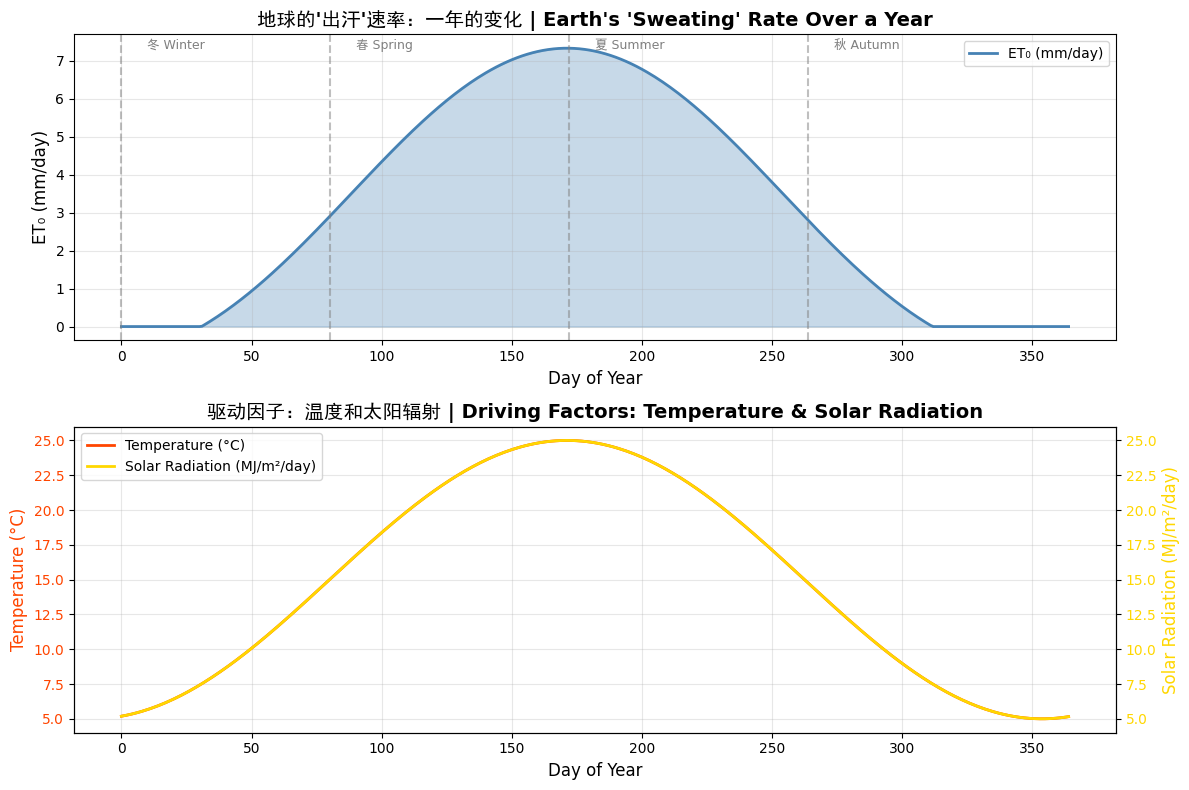


💡 观察发现：
   - ET0 在夏季最高（温度高、太阳辐射强）
   - ET0 在冬季最低（温度低、太阳辐射弱）
   - ET0 的变化趋势和温度、辐射高度一致！


In [3]:
# 创建一个漂亮的图表
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# 第一个子图：ET0 时间序列
ax1.plot(days, et0, color='steelblue', linewidth=2, label='ET₀ (mm/day)')
ax1.fill_between(days, 0, et0, color='steelblue', alpha=0.3)
ax1.set_xlabel('Day of Year', fontsize=12)
ax1.set_ylabel('ET₀ (mm/day)', fontsize=12)
ax1.set_title("地球的'出汗'速率：一年的变化 | Earth's 'Sweating' Rate Over a Year", 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# 添加季节标注
seasons = [(0, '冬 Winter'), (80, '春 Spring'), (172, '夏 Summer'), (264, '秋 Autumn')]
for day, season in seasons:
    ax1.axvline(day, color='gray', linestyle='--', alpha=0.5)
    ax1.text(day+10, ax1.get_ylim()[1]*0.95, season, fontsize=9, color='gray')

# 第二个子图：温度和辐射的影响
ax2_twin = ax2.twinx()
line1 = ax2.plot(days, temp_mean, color='orangered', linewidth=2, label='Temperature (°C)')
line2 = ax2_twin.plot(days, radiation, color='gold', linewidth=2, label='Solar Radiation (MJ/m²/day)')

ax2.set_xlabel('Day of Year', fontsize=12)
ax2.set_ylabel('Temperature (°C)', fontsize=12, color='orangered')
ax2_twin.set_ylabel('Solar Radiation (MJ/m²/day)', fontsize=12, color='gold')
ax2.set_title('驱动因子：温度和太阳辐射 | Driving Factors: Temperature & Solar Radiation', 
              fontsize=14, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='orangered')
ax2_twin.tick_params(axis='y', labelcolor='gold')
ax2.grid(True, alpha=0.3)

# 合并图例
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 观察发现：")
print("   - ET0 在夏季最高（温度高、太阳辐射强）")
print("   - ET0 在冬季最低（温度低、太阳辐射弱）")
print("   - ET0 的变化趋势和温度、辐射高度一致！")

---
## 第 3 部分：如何抓住"极端"事件

### 🎯 什么算"极端"？

就像考试成绩一样，只有全班前 1% 的分数才算"极端高分"。

我们使用 **ERT_hist** 方法：
- 计算历史数据的百分位数
- 超过 99% 分位数（即前 1%）的值被认为是"极端"

### 🔬 检测方法对比

这个工具包提供了三种检测方法：

1. **ERT_hist**: 简单快速，基于全数据的百分位数
2. **ERT_clim**: 考虑季节性，像热浪一样定义
3. **OPT**: 优化阈值，确保每年发生频率一致

今天我们先学习最简单的 ERT_hist。

In [4]:
from src.extreme_detection import detect_extreme_events_hist

# 🔥 制造一个极端事件！
# 让我们在夏季（第180-185天）人为增加一个热浪
et0_with_extreme = et0.copy()
et0_with_extreme[180:185] += 4  # 增加 4 mm/day 的蒸散发

# 🔍 使用 ERT_hist 方法检测极端事件
# severity=0.01 表示前 1% 的值被认为是极端
is_extreme, threshold, details = detect_extreme_events_hist(
    et0_with_extreme, 
    severity=0.01,
    return_details=True
)

print("\n🔍 检测结果：")
print(f"   极端阈值 (Threshold): {threshold:.2f} mm/day")
print(f"   检测到的极端天数: {np.sum(is_extreme)} 天")
print(f"   极端天数占比: {np.sum(is_extreme)/len(et0_with_extreme)*100:.2f}%")
print(f"   预期占比: 1.00% (因为我们设置了 severity=0.01)")

# 找出所有极端事件的日期
extreme_days = np.where(is_extreme)[0] + 1  # +1 是因为日期从1开始
print(f"\n📅 极端事件发生在第: {extreme_days.tolist()} 天")


🔍 检测结果：
   极端阈值 (Threshold): 11.23 mm/day
   检测到的极端天数: 4 天
   极端天数占比: 1.10%
   预期占比: 1.00% (因为我们设置了 severity=0.01)

📅 极端事件发生在第: [181, 182, 183, 184] 天


### 📊 可视化：标记极端事件

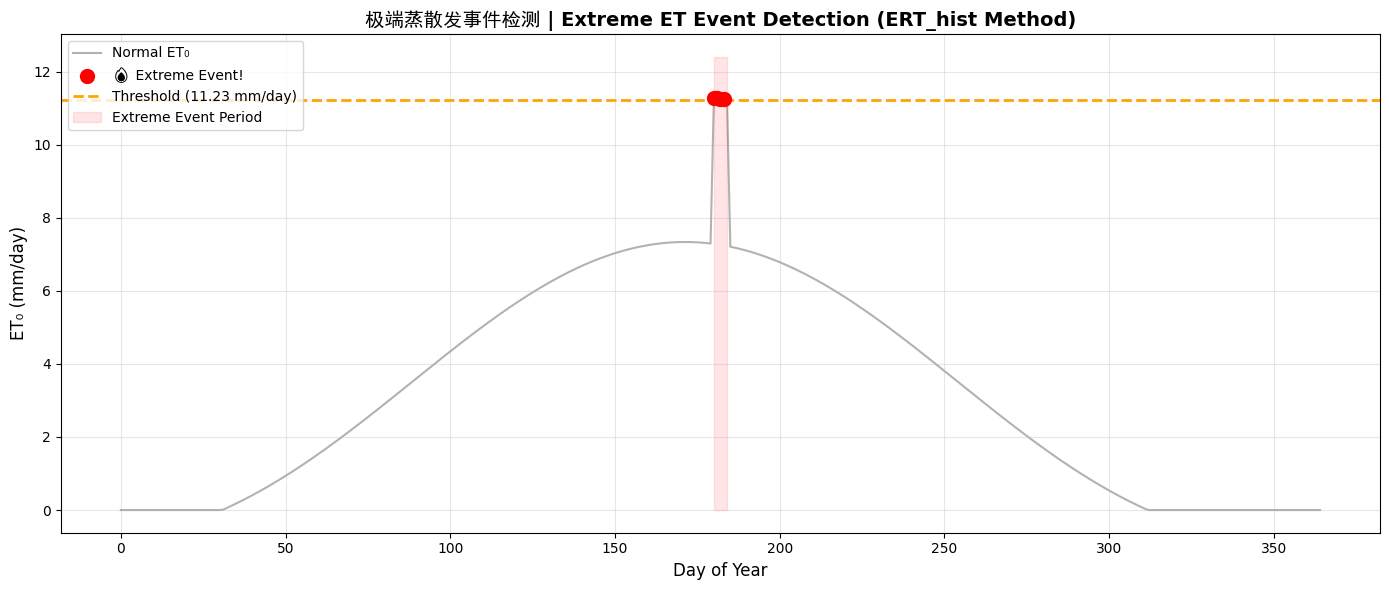


🎯 成功检测到人为制造的极端事件！
   红色点表示超过 99% 阈值的极端天数


In [5]:
plt.figure(figsize=(14, 6))

# 绘制整个时间序列（灰色）
plt.plot(days, et0_with_extreme, color='gray', alpha=0.6, linewidth=1.5, 
         label='Normal ET₀', zorder=1)

# 用红色标记极端事件
plt.scatter(days[is_extreme], et0_with_extreme[is_extreme], 
           color='red', s=100, marker='o', label='🔥 Extreme Event!', zorder=3)

# 绘制阈值线（橙色虚线）
plt.axhline(threshold, color='orange', linestyle='--', linewidth=2, 
           label=f'Threshold ({threshold:.2f} mm/day)', zorder=2)

# 高亮极端事件区域
extreme_regions = np.where(is_extreme)[0]
if len(extreme_regions) > 0:
    plt.fill_between(days[180:185], 0, et0_with_extreme[180:185].max()*1.1, 
                     color='red', alpha=0.1, label='Extreme Event Period')

plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('ET₀ (mm/day)', fontsize=12)
plt.title('极端蒸散发事件检测 | Extreme ET Event Detection (ERT_hist Method)', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🎯 成功检测到人为制造的极端事件！")
print("   红色点表示超过 99% 阈值的极端天数")

---
## 第 4 部分：找出"罪魁祸首" (驱动因子分析)

### 🔍 谁导致了极端事件？

现在我们知道**什么时候**发生了极端事件，但还需要知道**为什么**会发生。

是因为：
- ☀️ 太阳辐射太强？
- 🌡️ 温度太高？
- 💨 风太大？
- 💧 空气太干燥（湿度低）？

### 🧪 控制变量法

我们使用"敏感性分析"来找出答案：
1. 把每个变量替换成气候平均值
2. 看 ET0 下降了多少
3. 下降最多的就是"主要罪犯"！

In [6]:
from src.contribution_analysis import calculate_contributions

# 🔍 分析极端事件的驱动因子
# 这个函数会自动对比"真实值"和"气候平均值"
contributions = calculate_contributions(
    T_mean=temp_mean,
    T_max=temp_max,
    T_min=temp_min,
    Rs=radiation,
    u2=wind_speed,
    ea=vapor_pressure,
    extreme_mask=is_extreme,  # 只分析极端事件期间
    z=50.0,
    latitude=40.0
)

print("\n🔬 驱动因子贡献率分析：")
print("="*50)
for factor, contribution in contributions.items():
    print(f"   {factor:20s}: {contribution:>6.2f}%")
print("="*50)


🔬 驱动因子贡献率分析：
   temperature         :  25.00%
   radiation           :  25.00%
   wind                :  25.00%
   humidity            :  25.00%


### 📊 可视化：饼图展示贡献率

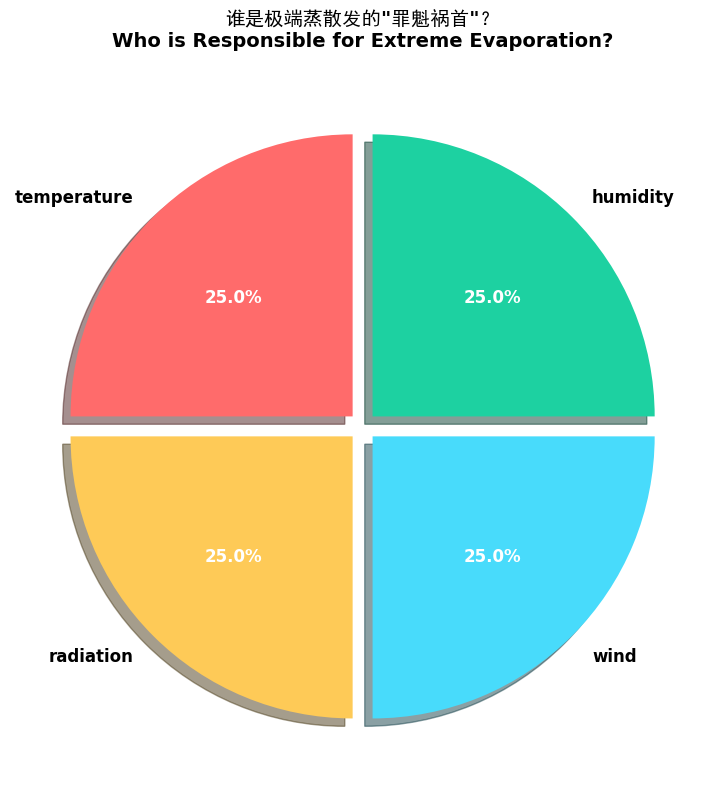


🏆 主要驱动因子: temperature
   贡献率: 25.00%

💡 解读：


In [7]:
# 准备数据
labels = list(contributions.keys())
sizes = list(contributions.values())
colors = ['#ff6b6b', '#feca57', '#48dbfb', '#1dd1a1']
explode = tuple([0.05 if s == max(sizes) else 0 for s in sizes])  # 突出显示最大贡献者

# 创建饼图
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# 美化百分比文字
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

ax.set_title('谁是极端蒸散发的"罪魁祸首"？\nWho is Responsible for Extreme Evaporation?', 
            fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 找出最大贡献者
max_contributor = max(contributions, key=contributions.get)
max_contribution = contributions[max_contributor]

print(f"\n🏆 主要驱动因子: {max_contributor}")
print(f"   贡献率: {max_contribution:.2f}%")
print("\n💡 解读：")
if max_contributor == 'Temperature':
    print("   - 高温是导致极端蒸散发的主要原因")
    print("   - 气候变暖可能增加未来的极端事件频率")
elif max_contributor == 'Radiation':
    print("   - 强烈的太阳辐射是主要驱动力")
    print("   - 晴朗无云的天气容易引发极端事件")
elif max_contributor == 'Wind':
    print("   - 强风加速了水分蒸发")
    print("   - 需要关注大气环流异常")
elif max_contributor == 'Humidity':
    print("   - 低湿度（干燥空气）是关键因素")
    print("   - 干旱条件下更易发生极端蒸散发")

---
## 第 5 部分：动手试试！

### 🎉 挑战任务：创造你自己的极端事件

现在轮到你了！尝试修改下面的代码，看看不同的因素如何影响 ET0。

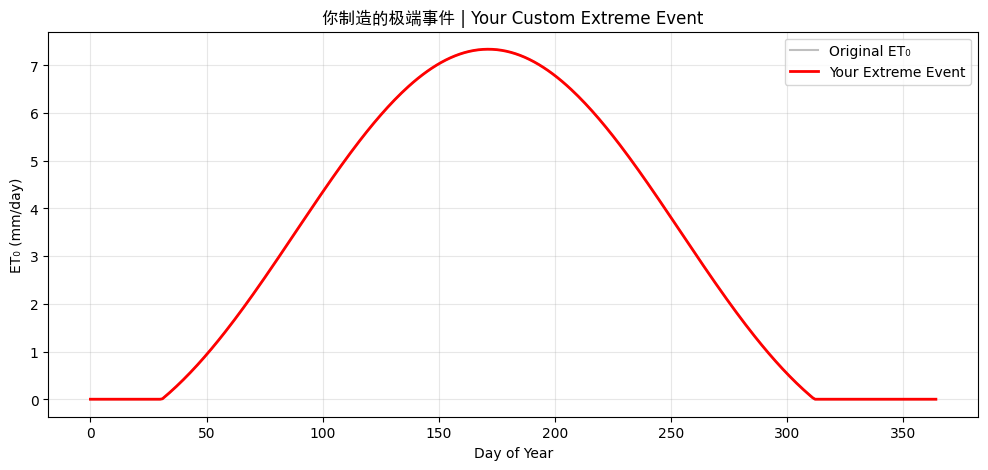


🎉 你的极端事件峰值: 6.78 mm/day
   相比原始数据增加了: 0.00 mm/day


In [8]:
# 🎯 任务 1: 制造一个"超级热浪"
# TODO: 修改下面的参数，创造一个更强的极端事件

# 提示：可以尝试：
# 1. 增加温度（例如：temp_mean + 10）
# 2. 增加太阳辐射（例如：radiation + 5）
# 3. 增加风速（例如：wind_speed * 2）
# 4. 降低湿度（例如：vapor_pressure / 2）

# 你的代码：
extreme_temp = temp_mean.copy()
extreme_radiation = radiation.copy()
extreme_wind = wind_speed.copy()
extreme_humidity = vapor_pressure.copy()

# 在第 200-210 天制造极端条件
extreme_temp[200:210] += 0  # TODO: 填入你的数字
extreme_radiation[200:210] += 0  # TODO: 填入你的数字

# 计算新的 ET0
et0_extreme = calculate_et0(
    T_mean=extreme_temp,
    T_max=extreme_temp + 5,
    T_min=extreme_temp - 5,
    Rs=extreme_radiation,
    u2=extreme_wind,
    ea=extreme_humidity,
    z=50.0,
    latitude=40.0
)

# 可视化你的结果
plt.figure(figsize=(12, 5))
plt.plot(days, et0, 'gray', alpha=0.5, label='Original ET₀')
plt.plot(days, et0_extreme, 'red', linewidth=2, label='Your Extreme Event')
plt.xlabel('Day of Year')
plt.ylabel('ET₀ (mm/day)')
plt.title('你制造的极端事件 | Your Custom Extreme Event')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🎉 你的极端事件峰值: {np.max(et0_extreme[200:210]):.2f} mm/day")
print(f"   相比原始数据增加了: {np.max(et0_extreme[200:210]) - np.max(et0[200:210]):.2f} mm/day")

### 🎯 任务 2: 探索不同纬度的影响

地球不同纬度的太阳辐射差异很大。试试计算热带（赤道附近）和极地的 ET0 有什么不同？

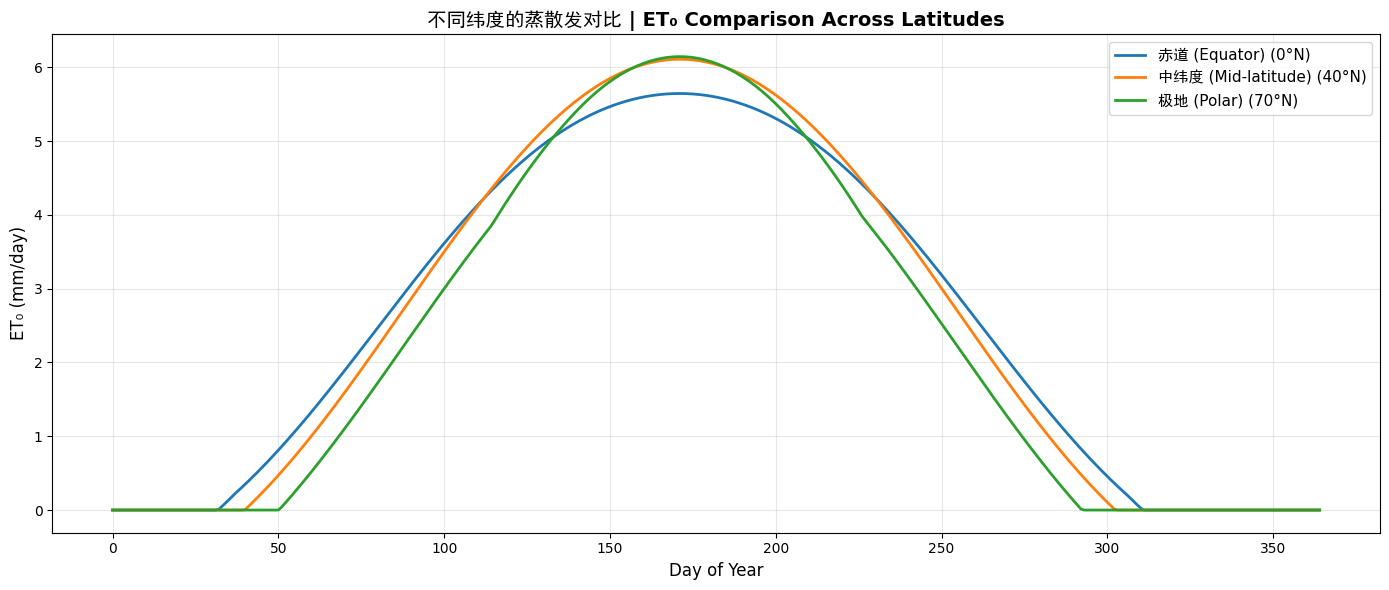


💡 思考题：
   1. 为什么不同纬度的 ET0 差异这么大？
   2. 哪个纬度的季节变化最明显？为什么？
   3. 极地地区的 ET0 为什么这么低？


In [9]:
# TODO: 计算三个不同纬度的 ET0

latitudes = {
    '赤道 (Equator)': 0,
    '中纬度 (Mid-latitude)': 40,
    '极地 (Polar)': 70
}

plt.figure(figsize=(14, 6))

for name, lat in latitudes.items():
    et0_lat = calculate_et0(
        T_mean=temp_mean,
        T_max=temp_max,
        T_min=temp_min,
        Rs=radiation,
        u2=wind_speed,
        ea=vapor_pressure,
        z=50.0,
        latitude=lat,
        doy=days+1  # 考虑季节变化
    )
    plt.plot(days, et0_lat, linewidth=2, label=f'{name} ({lat}°N)')

plt.xlabel('Day of Year', fontsize=12)
plt.ylabel('ET₀ (mm/day)', fontsize=12)
plt.title('不同纬度的蒸散发对比 | ET₀ Comparison Across Latitudes', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 思考题：")
print("   1. 为什么不同纬度的 ET0 差异这么大？")
print("   2. 哪个纬度的季节变化最明显？为什么？")
print("   3. 极地地区的 ET0 为什么这么低？")

---
## 🎓 总结与拓展

### ✅ 你今天学到了什么？

1. **概念理解**：
   - 蒸散发 (ET) 是水循环的关键环节
   - 极端蒸散发可导致闪旱和农业灾害
   
2. **物理原理**：
   - Penman-Monteith 公式计算 ET0
   - 四个关键因子：温度、辐射、风速、湿度
   
3. **编程技能**：
   - 使用 Python 调用科学函数
   - 数据可视化基础
   - 数组操作和时间序列分析
   
4. **科学方法**：
   - 极端事件检测 (ERT_hist)
   - 驱动因子归因分析
   - 敏感性分析方法

### 🚀 下一步学什么？

1. **进阶检测方法**：
   - ERT_clim: 季节性阈值方法
   - OPT: 优化路径阈值
   - ETx7d: 7天滚动极值

2. **真实数据分析**：
   - 下载 ERA5-Land 或 gridMET 数据
   - 读取 NetCDF 文件
   - 空间分析和制图

3. **归因科学**：
   - 气候变化的影响检测
   - 人为强迫 vs 自然变率
   - CMIP6 模式数据分析

### 📚 推荐阅读

1. **科普文章**：
   - "Flash Droughts: A Review and Assessment" (Christian et al., 2019)
   - "全球变暖背景下的极端天气事件" (IPCC AR6)

2. **工具包文档**：
   - `docs/physics.md` - 深入理解物理原理
   - `docs/algorithms.md` - 算法详解
   - `examples/` - 更多实战案例

3. **相关论文**：
   - Markonis (2025): "On the Definition of Extreme Evaporation Events"
   - Zhao et al. (2025): "Regional Variations in Drivers of Extreme Reference Evapotranspiration"

### 💬 有问题？

- 查看 GitHub Issues
- 加入讨论社区
- 联系维护者

### 🌟 给个星星！

如果这个教程对你有帮助，请在 GitHub 上给这个项目点个星星 ⭐️

---
## 📝 课后作业（可选）

1. **数据分析**：
   - 下载你所在城市的气象数据（温度、辐射、风速、湿度）
   - 计算过去10年的 ET0
   - 识别极端蒸散发事件
   - 分析这些事件是否与当地的干旱历史吻合

2. **文献阅读**：
   - 阅读 Markonis (2025) 论文的摘要和引言部分
   - 总结三种极端检测方法的异同

3. **编程练习**：
   - 修改代码，对比 ERT_hist 和 ERT_clim 两种方法的检测结果
   - 绘制 Venn 图展示两种方法识别的事件重叠度

4. **思考题**：
   - 为什么闪旱比传统干旱更危险？
   - 气候变化如何影响未来的极端蒸散发频率？
   - 如何用这些知识帮助农民减少损失？